In [1]:
import numpy as np
#import gym
import sys
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib


%matplotlib inline
#fig, ax = plt.subplots(figsize=(20, 10)) 
#fig, ax = plt.subplots(figsize=(18, 2))
#ax.imshow(random.rand(8, 90), interpolation='nearest')
#tight_layout()

#fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(20,20)

sys.path.append('../src')
sys.path.append('../src/envs')
sys.path.append('../src/game_generator')
sys.path.append('../src/agents')
sys.path.append('../src/utils')

def showim(buffer):
    fig, ax = plt.subplots(figsize=(9, 9))
    #ax.imshow(random.rand(8, 90), interpolation='nearest')
    ax.imshow(buffer,interpolation='nearest',aspect='auto')

In [2]:

from robot_reboot_extractor import RobotRebootExtractor
from ricochet_env import RicochetEnv
from agent_dqn import DQNAgent
from simulation import Experiment
from utils import helper

Using TensorFlow backend.


In [3]:
agent , env = helper.prepare_game('game0.png')

<IPython.core.display.Javascript object>


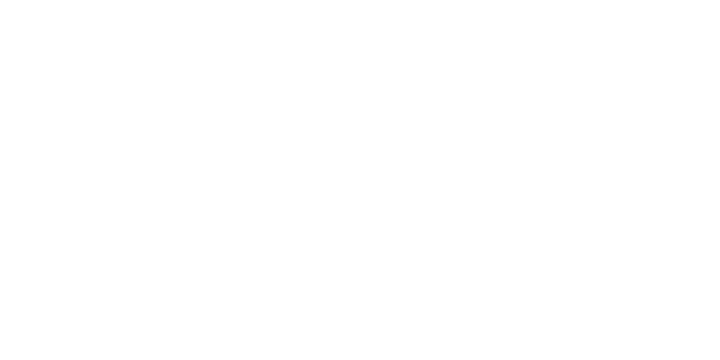

remember
remember
remember
remember
remember
remember
remember
remember
remember
remember
remember
remember
remember
remember
remember
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
episode : 0
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
remember
(16, 8)
rem

<IPython.core.display.Javascript object>


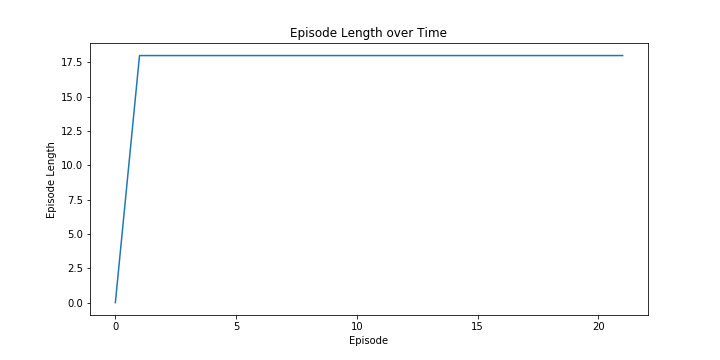

<IPython.core.display.Javascript object>


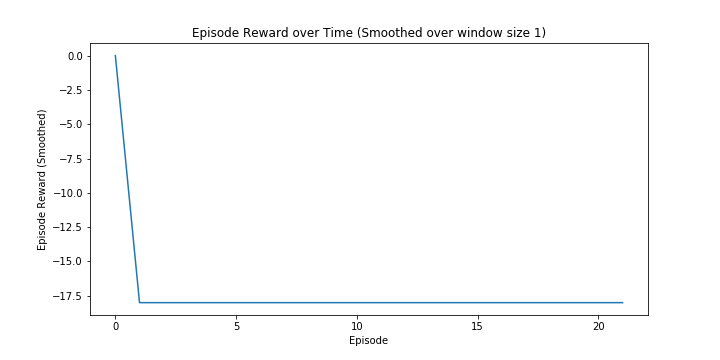

In [4]:
interactive = True
%matplotlib nbagg

#agent = DQNAgent(8 , 4*4)
#agent = DQNAgent(8 , 4)

experiment = Experiment(env, agent, debug_print_interval=20)

#experiment.run_agent( max_number_of_episodes=5, max_number_of_steps=100, interactive = True, display_frequency=1)#
experiment.run_qlearning( max_number_of_episodes=21,  interactive = False, display_frequency=1)


In [9]:
agent.remember_count 

378

In [8]:
agent.number_of_model_fit


363

In [6]:
helper.save_model(agent.model)

Saved model to disk


In [3]:
im = Image.open( '../games/game1.png').convert('RGB')

In [5]:
agent.epsilon

0.009888364709658948

In [7]:
state = env.reset()
state = state.reshape( [1,8])

act_values = agent.model.predict(state)
action = np.argmax(act_values[0])  # returns action
act_values , action

(array([[-5.4507294, -5.9532557, -5.535567 , -5.495936 , -5.4748387,
         -5.863617 , -6.285168 , -5.5804424, -6.123562 , -5.4165087,
         -5.543996 , -5.85697  , -6.012794 , -5.6497416, -6.0025463,
         -5.7521787]], dtype=float32), 9)

In [7]:
action = np.argmax(act_values[0])  # returns action
act_values , action

(array([[-4.974521 , -4.990849 , -5.1575017, -4.936163 , -5.235556 ,
         -4.9855275, -4.9763665, -5.1229873, -5.020588 , -5.1459703,
         -5.181181 , -4.9379086, -5.43479  , -4.9769735, -5.3396544,
         -5.2792587]], dtype=float32), 3)

In [8]:
env.decode_action( 3 )

(0, 3)

In [6]:
rre = RobotRebootExtractor(im)

In [7]:
env = RicochetEnv(rre)
env.reset()

[[1, 2], [13, 0], [11, 11], [7, 13]]

In [9]:
buffer = env.render(mode='rgb_array')

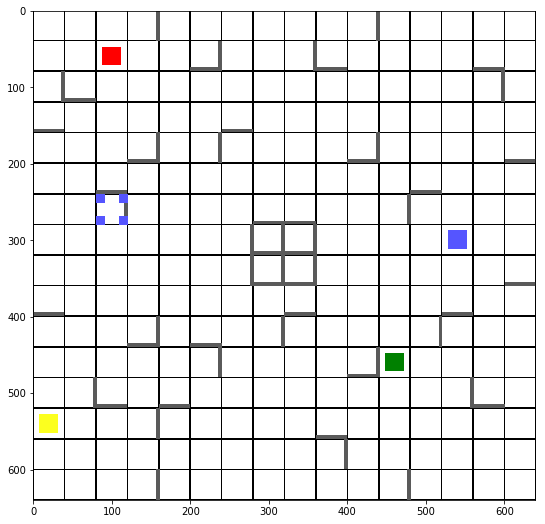

In [9]:
showim(buffer)

In [11]:
env.step( env.encode_action( 'r' , 'N') )

([[0, 2], [13, 0], [11, 11], [7, 13]], -1, False, '')

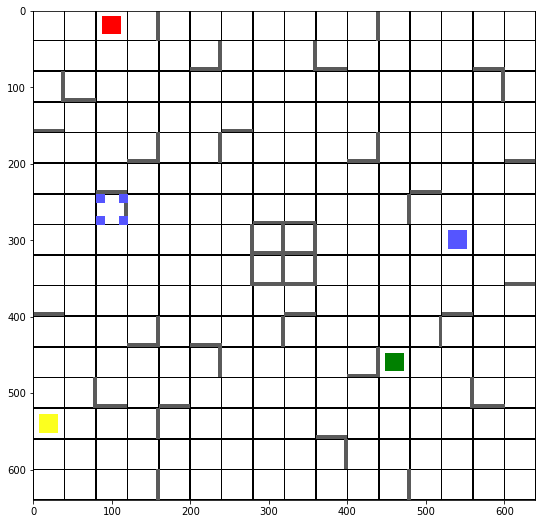

In [12]:
showim( buffer = env.render() )

([[0, 2], [13, 0], [11, 11], [13, 9]], -1, False, '')

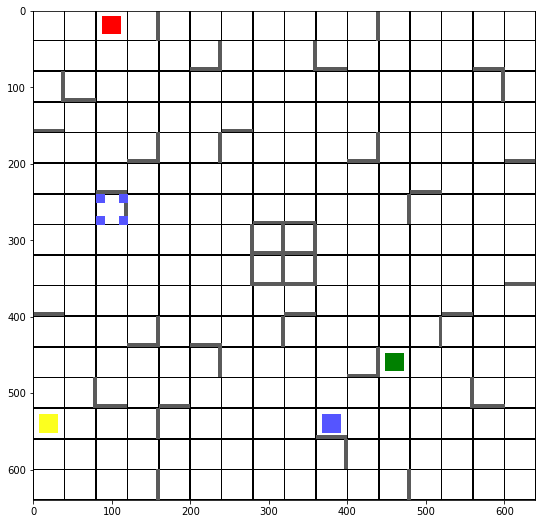

In [14]:
state = env.step( env.encode_action( 'b' , 'S') )
showim( buffer = env.render() )
state

In [8]:
rre.goal

(6, 2, 'b')

In [ ]:
%load_ext autoreload

In [17]:

%autoreload 2

[[1, 2], [13, 0], [11, 11], [7, 13]]


In [5]:
def prepare_game(img_file='game1.png'):
    im = Image.open( '../games/' + img_file).convert('RGB')
    agent = DQNAgent(8 , 4)
    rre = RobotRebootExtractor(im)
    env = RicochetEnv(rre)
    
    return agent , env

In [6]:
agent , env = prepare_game()

<IPython.core.display.Javascript object>


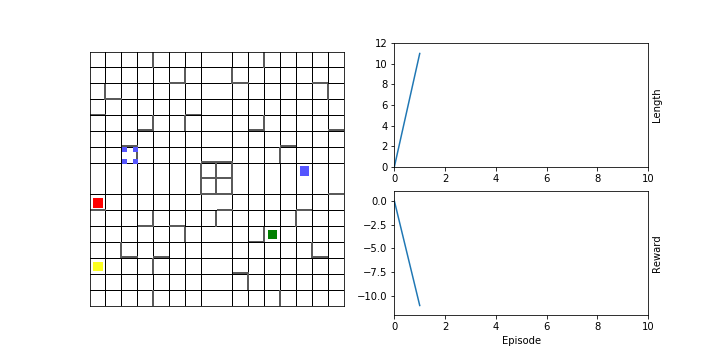

too many steps. Stopped


In [7]:
interactive = True
%matplotlib nbagg

experiment = Experiment(env, agent)

experiment.run_agent( max_number_of_episodes=1, max_number_of_steps=10, interactive = True, display_frequency=1)

In [28]:
import collections
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np
import random

# Deep Q-learning Agent
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = collections.deque(maxlen=2000)
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse',
                      optimizer=Adam(lr=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        print('act =============  ' + str(self.epsilon))
        
        
        if np.random.rand() <= self.epsilon:
            action = random.randrange(self.action_size)
            print(action)
            return action
        
        print(' act state')
        #print( state )
        state = state.reshape( [1, 8])
        act_values = self.model.predict(state)
        
        #print('aaa')
        print(act_values)
        action = np.argmax(act_values[0])  # returns action
        return action


    def learn(self, state, action, reward, next_state, done):
        #print('state')
        #print(state)
        #print('next state')
        #print(next_state)
        state = state.reshape( [1, 8])
        next_state = next_state.reshape( [1, 8])
        self.remember(state, action, reward, next_state, done)
        self.replay(batch_size = 16)

    def replay(self, batch_size):
        if len( self.memory ) < batch_size :
            return 

        minibatch = random.sample(self.memory, batch_size)

        for state, action, reward, next_state, done in minibatch:
            target = reward
            
            next_state = next_state.reshape( [1, 8])
            print('target: ' + str(target))
            if not done:
                print('kkkkkkkkkkkkkkk')
                print('state')
                print(state)
                print('predicct')
                
                
                print('new next state')
                print(next_state)
                
                predict_next_state_action_values = self.model.predict(next_state)
                
                max_next_state_action_value = np.amax( predict_next_state_action_values[0] )
                
                print(predict_next_state_action_values)
                print(max_next_state_action_value)
                target = reward + self.gamma * max_next_state_action_value

            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay



<IPython.core.display.Javascript object>


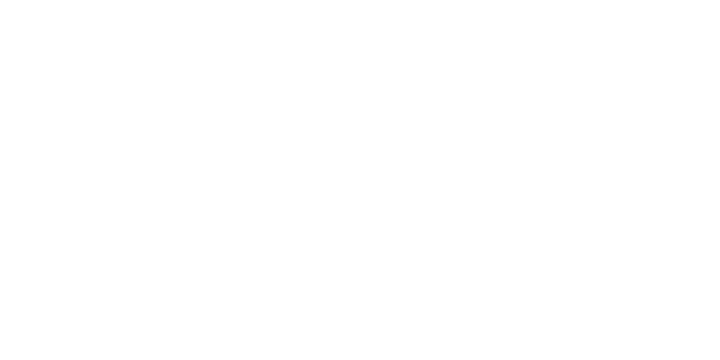

act =============  1.0
3
act =============  1.0
15
act =============  1.0
11
act =============  1.0
12
act =============  1.0
3
act =============  1.0
0
act =============  1.0
6
act =============  1.0
8
act =============  1.0
13
act =============  1.0
10
act =============  1.0
11
act =============  1.0
10
act =============  1.0
0
act =============  1.0
9
act =============  1.0
5
act =============  1.0
6
target: -1
kkkkkkkkkkkkkkk
state
[[ 0  0 11 15 13 14  5  6]]
predicct
new next state
[[ 0  0 11 15 13 14  5  6]]
[[-0.5030209   7.2782884  -2.6078625   3.7794998   1.0931765   5.046959
   1.9980476   0.52366316  0.40218925  0.5736337  -2.1422238  -5.0744977
   1.4983538   3.7930193  -8.717448   -0.3661944 ]]
7.2782884
target: -1
kkkkkkkkkkkkkkk
state
[[ 0  0 11 15 13 14  5  6]]
predicct
new next state
[[ 0  0 11 15 13 14  5  6]]
[[-0.46930182  7.3071666  -2.7539744   4.09981     1.0442718   4.979336
   2.0390508   0.582162    0.25632563  0.5925824  -2.2354627  -5.1088133
   1.5257478   

target: -1
kkkkkkkkkkkkkkk
state
[[ 0  3 11 12 13 14  5  6]]
predicct
new next state
[[ 0  3 11 12 13 14  5  6]]
[[ 2.2569485   6.351287   -1.219152    4.6648965  -1.1914252   5.1959386
   3.7347763  -0.81137955  3.432325    1.9288695  -0.14731914 -1.9936337
   0.22754753  4.9985948  -6.116435   -0.9041058 ]]
6.351287
target: -1
kkkkkkkkkkkkkkk
state
[[ 0  3 11 12 13 14  5  6]]
predicct
new next state
[[ 0  3 11 12 13 14  5  6]]
[[ 2.3261623   6.3724675  -1.1865151   4.686119   -1.2358174   5.18488
   3.742853   -0.85945165  3.5134048   1.9053056  -0.02786398 -1.9366153
   0.19195418  5.0480933  -6.085219   -0.92672634]]
6.3724675
act =============  0.9752487531218751
8
target: -1
kkkkkkkkkkkkkkk
state
[[ 0  3 11 12 13 14  5  6]]
predicct
new next state
[[ 0  3 11 12 13 14  5  6]]
[[ 2.395808    6.3904133  -1.143089    4.6946077  -1.2888747   5.159179
   3.747609   -0.9126947   3.6009507   1.879441    0.09086927 -1.8521266
   0.13801618  5.102754   -6.0467906  -0.9380164 ]]
6.3904133
t

<IPython.core.display.Javascript object>


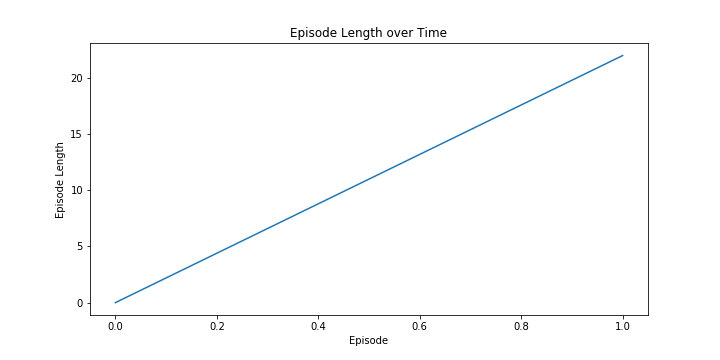

<IPython.core.display.Javascript object>


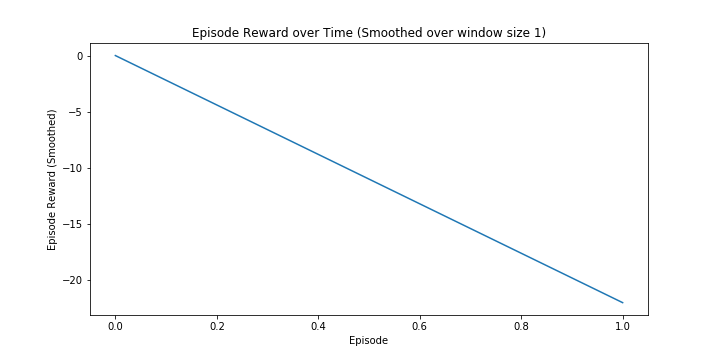

In [30]:
agent = DQNAgent(8 , 4*4)
experiment = Experiment(env, agent)
experiment.run_qlearning( max_number_of_episodes=1,  interactive = False, display_frequency=1)

In [6]:
a = [ [ 2,4] , [2,5] , [1,4] , [6,2]]

In [7]:
b = np.array(a)

In [35]:
b[0] = (3,14)

In [37]:
ccc = np.array( [ 3,14])

In [38]:
ccc

array([ 3, 14])

In [39]:
b[0] 

array([ 3, 14])

In [40]:
b[0] == ccc

array([ True,  True])

In [42]:
r1 , r2 = b[0]

In [43]:
r1

3

In [44]:
r2

14

In [5]:
b

NameError: name 'b' is not defined

In [21]:
np.all( b[0] == [2,1] )

False

In [17]:
b[0]

array([2, 4])

In [7]:
a = np.random.randint( 0 , 10 , (1,5))
b = np.random.randint( 0 , 10 , (1,5))
c = np.random.randint( 0 , 10 , (1,5))

In [6]:
a

array([[7, 6, 7, 0, 8]])

In [8]:
a 

array([[0, 7, 9, 4, 7]])

In [9]:
b

array([[5, 2, 9, 0, 3]])

In [10]:
c

array([[7, 6, 9, 6, 2]])

In [11]:
a + b

array([[ 5,  9, 18,  4, 10]])

In [12]:
np.concatenate( [a , b , c])

array([[0, 7, 9, 4, 7],
       [5, 2, 9, 0, 3],
       [7, 6, 9, 6, 2]])